In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#load in csv
df = pd.read_csv('stroke_prediction_dataset.csv')

#replace string binary classification variables with 1 or 0
df['gender'] = df['gender'].replace('Male', 1).replace('Female',0)
df['ever_married'] = df['ever_married'].replace('Yes', 1).replace('No',0)
df['Residence_type'] = df['Residence_type'].replace('Urban', 1).replace('Rural',0)

#rename gender and residence_type columns to make 1/0 more clear
df = df.rename(columns={"gender": "gender (1 = male)"})
df = df.rename(columns={"Residence_type": "Residence_type (1 = Urban)"})

#remove single Other entry for gender
df = df[df['gender (1 = male)'] != 'Other']

#break string categorical variables into separate columns to convert to binary classification variable
df['work_type: Private'] = df['work_type']=='Private'
df['work_type: Self-Employed'] = df['work_type']=='Self-employed'
df['work_type: Child'] = df['work_type']=='children'
df['work_type: Government Job'] = df['work_type']=='Govt_job'
df['work_type: Never Worked'] = df['work_type']=='Never_worked'

df['smoking_status: Never Smoked'] = df['smoking_status']=='never smoked'
df['smoking_status: Unknown'] = df['smoking_status']=='Unknown'
df['smoking_status: Former Smoker'] = df['smoking_status']=='formerly smoked'
df['smoking_status: Active Smoker'] = df['smoking_status']=='smokes'

#replace True/False with 1 or 0
df = df.replace({True: 1, False: 0})

#drop work_type and smoking_status columns since these were broken out
df = df.drop(['work_type','smoking_status'], axis=1)

#convert id column into index
df = df.set_index('id')

#remove NaNs
df = df.dropna()

df

In [62]:
df

,id,gender (1 = male),age,hypertension,heart_disease,ever_married,Residence_type (1 = Urban),avg_glucose_level,bmi,stroke,work_type: Private,work_type: Self-Employed,work_type: Child,work_type: Government Job,work_type: Never Worked,smoking_status: Never Smoked,smoking_status: Unknown,smoking_status: Former Smoker,smoking_status: Active Smoker
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,0,0,0,0,1,0
1,31112,1,80.0,0,1,1,0,105.92,32.5,1,1,0,0,0,0,1,0,0,0
2,60182,0,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,0,0,0,1
3,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,0,0
4,56669,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,0,13.0,0,0,0,0,103.08,18.6,0,0,0,1,0,0,0,1,0,0
4904,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,1,0,0,0,1,0,0,0
4905,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,1,0,0,0,1,0,0,0
4906,37544,1,51.0,0,0,1,0,166.29,25.6,0,1,0,0,0,0,0,0,1,0


In [92]:
#load in csv
df = pd.read_csv('stroke_prediction_dataset.csv')

In [93]:
df

,id,gender (1 = male),age,hypertension,heart_disease,ever_married,Residence_type (1 = Urban),avg_glucose_level,bmi,stroke,work_type: Private,work_type: Self-Employed,work_type: Child,work_type: Government Job,work_type: Never Worked,smoking_status: Never Smoked,smoking_status: Unknown,smoking_status: Former Smoker,smoking_status: Active Smoker
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,0,0,0,0,1,0
1,31112,1,80.0,0,1,1,0,105.92,32.5,1,1,0,0,0,0,1,0,0,0
2,60182,0,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,0,0,0,1
3,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,0,0
4,56669,1,81.0,0,0,1,1,186.21,29.0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,0,13.0,0,0,0,0,103.08,18.6,0,0,0,1,0,0,0,1,0,0
4904,44873,0,81.0,0,0,1,1,125.20,40.0,0,0,1,0,0,0,1,0,0,0
4905,19723,0,35.0,0,0,1,0,82.99,30.6,0,0,1,0,0,0,1,0,0,0
4906,37544,1,51.0,0,0,1,0,166.29,25.6,0,1,0,0,0,0,0,0,1,0


In [94]:
df.columns

Index(['id', 'gender (1 = male)', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type (1 = Urban)', 'avg_glucose_level',
       'bmi', 'stroke', 'work_type: Private', 'work_type: Self-Employed',
       'work_type: Child', 'work_type: Government Job',
       'work_type: Never Worked', 'smoking_status: Never Smoked',
       'smoking_status: Unknown', 'smoking_status: Former Smoker',
       'smoking_status: Active Smoker'],
      dtype='object')

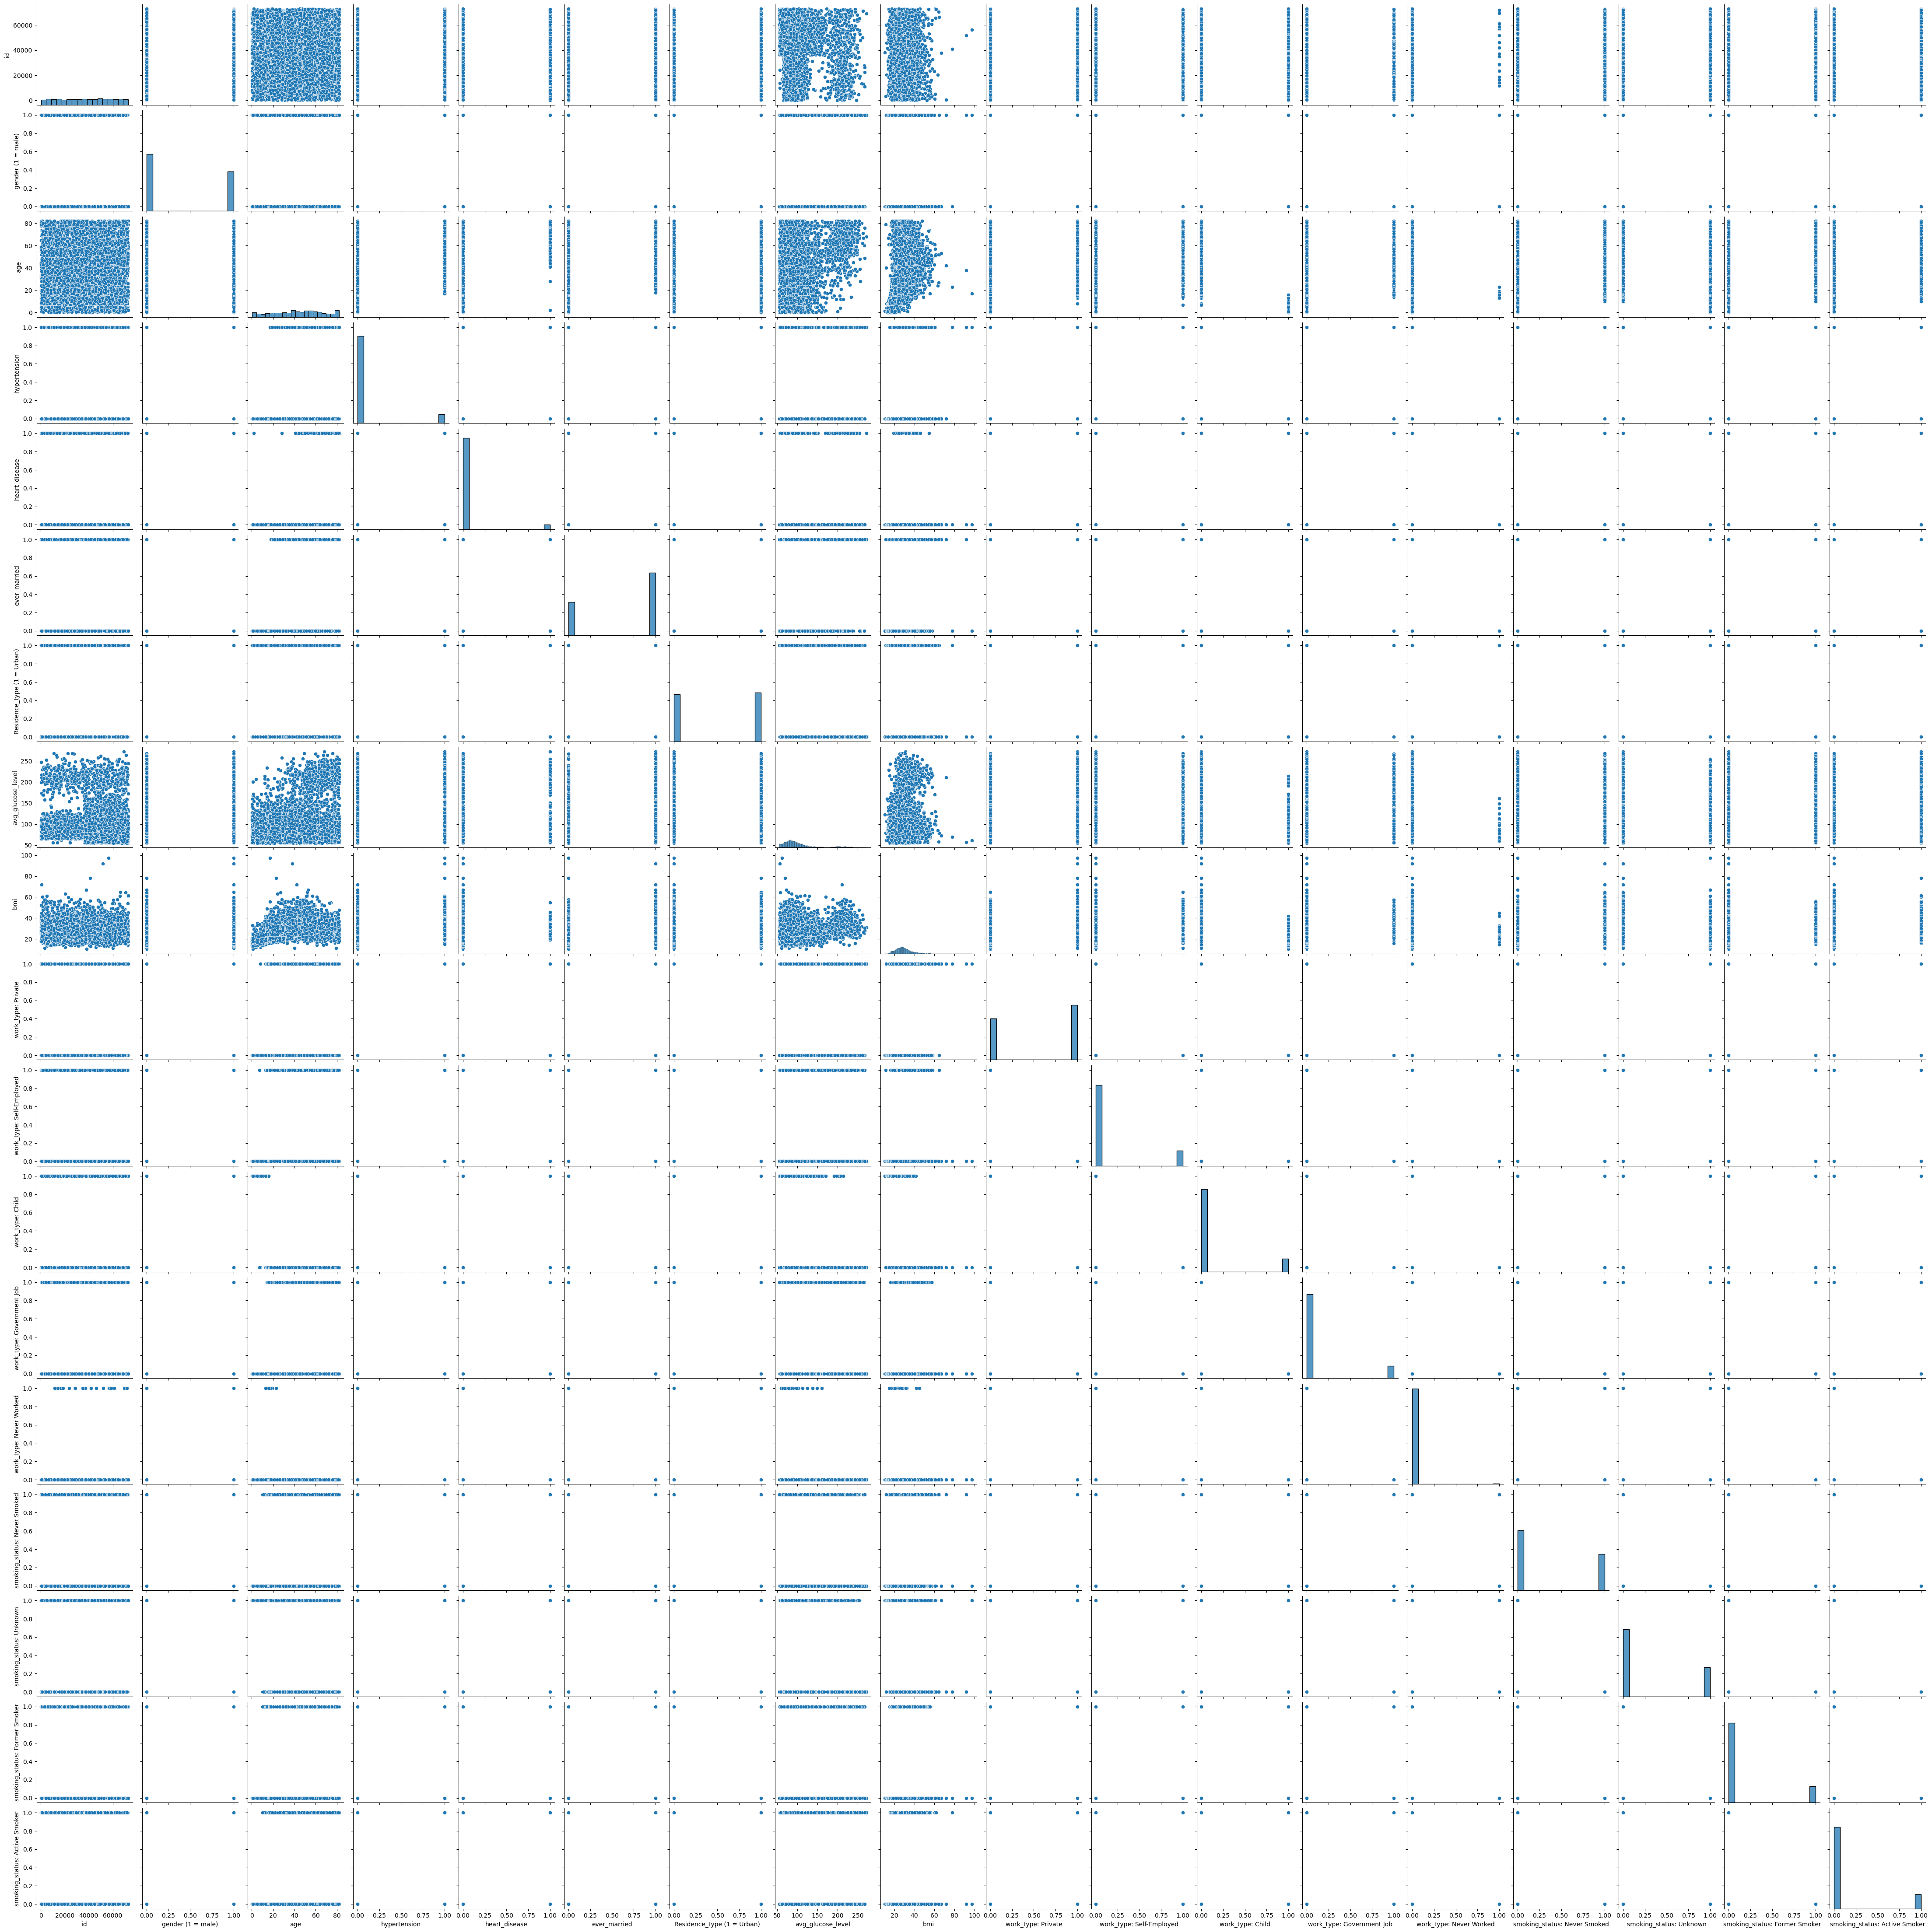

In [84]:
# c. Pairwise scatterplots of the predictors

# Predictor columns
predictors = ['id', 'gender (1 = male)', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type (1 = Urban)', 'avg_glucose_level',
       'bmi', 'work_type: Private', 'work_type: Self-Employed',
       'work_type: Child', 'work_type: Government Job',
       'work_type: Never Worked', 'smoking_status: Never Smoked',
       'smoking_status: Unknown', 'smoking_status: Former Smoker',
       'smoking_status: Active Smoker']

# Creating pairwise scatterplots
sns.pairplot(df[predictors])
plt.show()

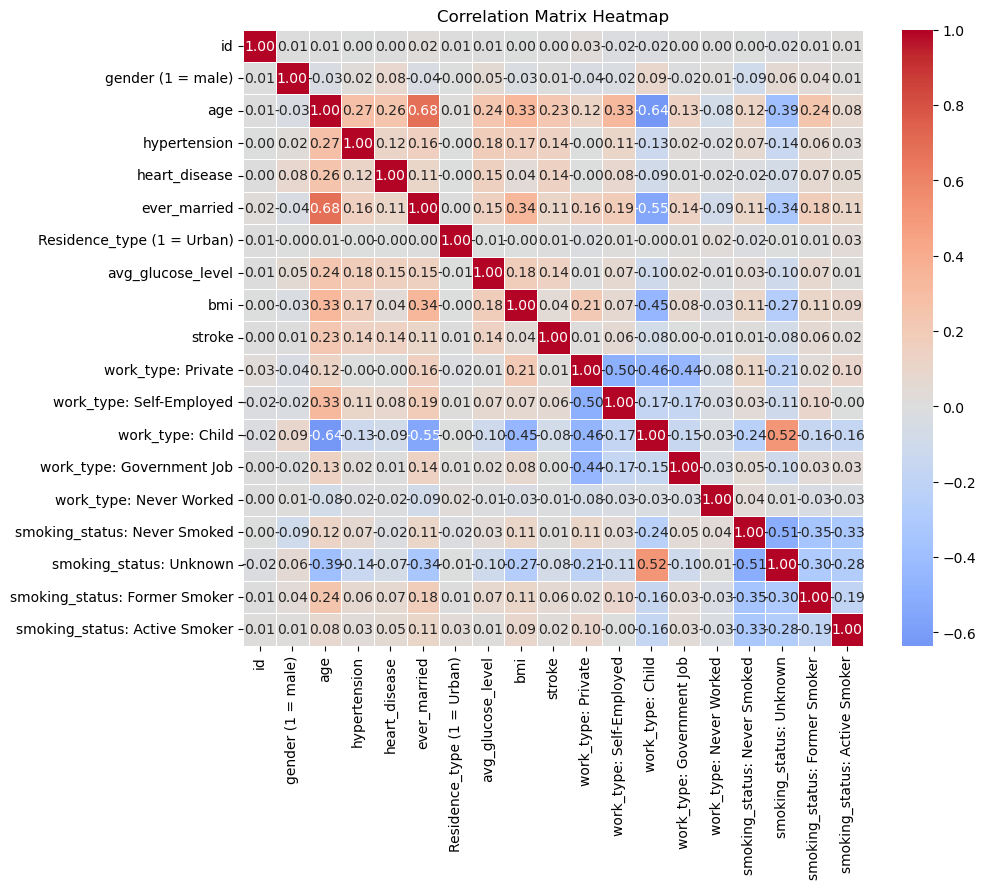

In [85]:
# Creating the correlation matrix
correlation_matrix = df.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [121]:
X = df[['gender (1 = male)', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type (1 = Urban)', 'avg_glucose_level',
       'bmi', 'work_type: Private', 'work_type: Self-Employed',
       'work_type: Child', 'work_type: Government Job',
       'work_type: Never Worked', 'smoking_status: Never Smoked',
       'smoking_status: Unknown', 'smoking_status: Former Smoker',
       'smoking_status: Active Smoker']]
y = df[['stroke']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     28.79
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           6.38e-79
Time:                        09:29:37   Log-Likelihood:                 1095.8
No. Observations:                4908   AIC:                            -2160.
Df Residuals:                    4892   BIC:                            -2056.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
gender (1 = ma

### Training a Classification model

In [113]:
# c. Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.95
Confusion Matrix:
[[928   1]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random forest Classifier

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.95
Confusion Matrix:
[[928   1]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



### Gradient Boosting Classifier

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.94
Confusion Matrix:
[[927   2]
 [ 53   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.94       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.94      0.92       982



In [116]:
df.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

### Under sampling

In [117]:
li = []

li.append(df[df['stroke'] == 1])
li.append(df[df['stroke'] == 0].sample(len(df[df['stroke'] == 1]) * 2))

df_under = pd.concat(li)

X = df_under[['gender (1 = male)', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'Residence_type (1 = Urban)', 'avg_glucose_level',
       'bmi', 'work_type: Private', 'work_type: Self-Employed',
       'work_type: Child', 'work_type: Government Job',
       'work_type: Never Worked', 'smoking_status: Never Smoked',
       'smoking_status: Unknown', 'smoking_status: Former Smoker',
       'smoking_status: Active Smoker']]
y = df_under[['stroke']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
# c. Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.71
Confusion Matrix:
[[67 18]
 [18 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        85
           1       0.56      0.56      0.56        41

    accuracy                           0.71       126
   macro avg       0.67      0.67      0.67       126
weighted avg       0.71      0.71      0.71       126



/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.74
Confusion Matrix:
[[68 17]
 [16 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        85
           1       0.60      0.61      0.60        41

    accuracy                           0.74       126
   macro avg       0.70      0.70      0.70       126
weighted avg       0.74      0.74      0.74       126



/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


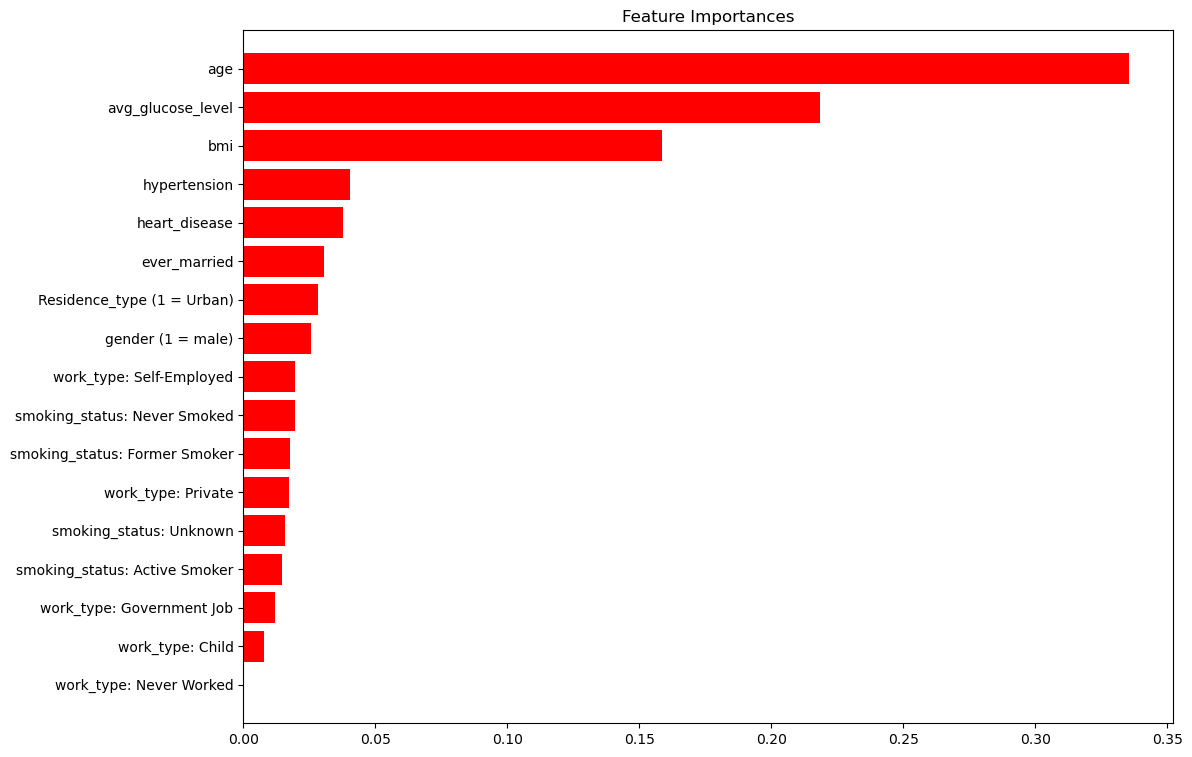

In [120]:
importances=rf_classifier.feature_importances_

# Pinta la importancia de las variables
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = (12, 9)
plt.figure()
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

df_gini=pd.DataFrame()
df_gini['Variable']= X_train.columns[indices]
df_gini['Importancia_Gini']=importances[indices]
df_gini['Indices_Gini']=indices
df_gini=df_gini.set_index('Variable')

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Random Forest classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[71 14]
 [21 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        85
           1       0.59      0.49      0.53        41

    accuracy                           0.72       126
   macro avg       0.68      0.66      0.67       126
weighted avg       0.71      0.72      0.71       126



/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
df.dtypes

id                                 int64
gender (1 = male)                  int64
age                              float64
hypertension                       int64
heart_disease                      int64
ever_married                       int64
Residence_type (1 = Urban)         int64
avg_glucose_level                float64
bmi                              float64
stroke                             int64
work_type: Private                 int64
work_type: Self-Employed           int64
work_type: Child                   int64
work_type: Government Job          int64
work_type: Never Worked            int64
smoking_status: Never Smoked       int64
smoking_status: Unknown            int64
smoking_status: Former Smoker      int64
smoking_status: Active Smoker      int64
dtype: object

### Random Forest Classifier with Oversampling

In [122]:
# Create the RandomOverSampler object
ros = RandomOverSampler(random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [123]:
y_resampled.stroke.value_counts()

0    3770
1    3770
Name: stroke, dtype: int64

In [124]:


# Step 4: Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Step 5: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

/Users/nicolasrey/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.94
Confusion Matrix:
[[922   7]
 [ 52   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.12      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.54      0.51      0.50       982
weighted avg       0.90      0.94      0.92       982



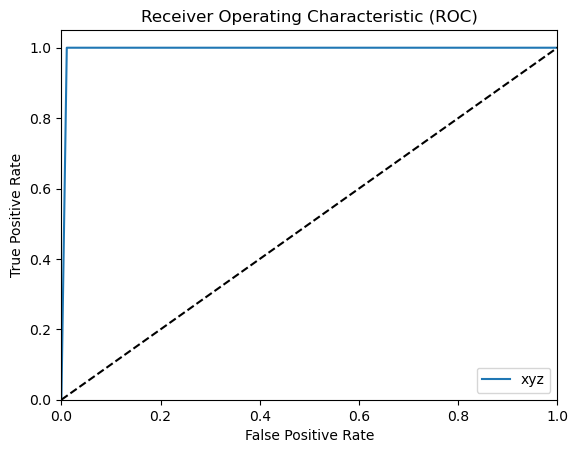

In [99]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='xyz')
# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()